In [288]:
from google.colab import drive    
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Archive:  /content/gdrive/My Drive/Colab Notebooks/LSTM/Mall Footfall prediction/lcc-footfall.zip
replace ./weather_data/overall_weather.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./weather_data/overall_weather.csv  
  inflating: ./footfall_data/footfall.csv  
  inflating: ./footfall_data/footfall.csv.gz  
  inflating: ./holiday_data/Easter-Sundays.csv  
  inflating: ./holiday_data/school_hols_long.csv  
  inflating: ./holiday_data/UKbankholidays.csv  
  inflating: ./holiday_data/uni_hols_long.csv  


# Business understanding

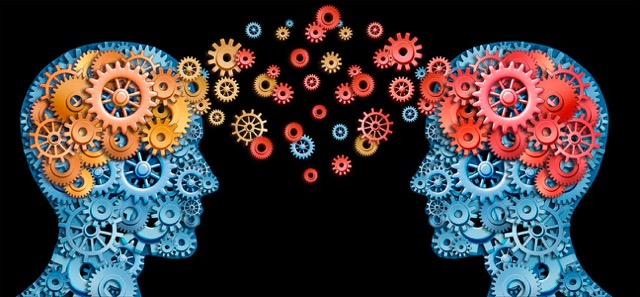

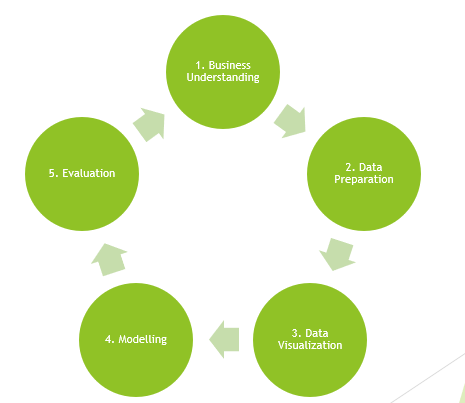

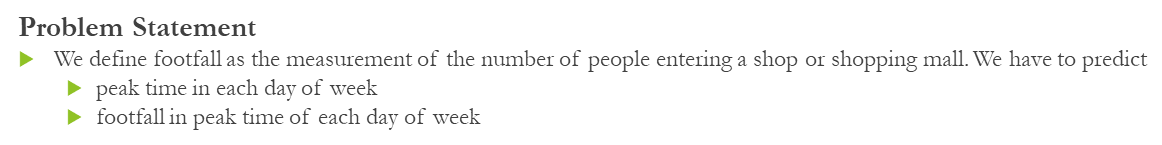

# Data Acquisition 

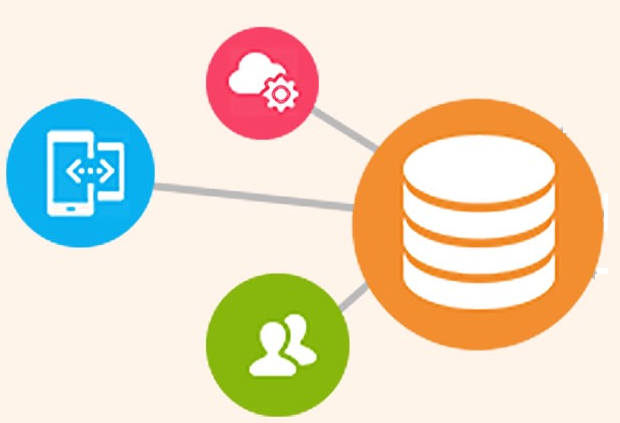

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/LSTM/Mall Footfall prediction')
!unzip '/content/gdrive/My Drive/Colab Notebooks/LSTM/Mall Footfall prediction/lcc-footfall.zip' -d .


In [290]:
FOOTFALL_DATA = "footfall_data/footfall.csv"
WEATHER_DATA = "weather_data/overall_weather.csv"
EASTER_SUNDAYS_HOLIDAYS_DATA = "holiday_data/Easter-Sundays.csv"
UK_BANK_HOLIDAYS_DATA = "holiday_data/UKbankholidays.csv"
UNIVERSITY_LONG_HOLIDAYS_DATA = "holiday_data/uni_hols_long.csv"
SCHOOL_LONG_HOLIDAYS_DATA = "holiday_data/school_hols_long.csv"



# Data preparation

In [291]:
foot_fall_df = pd.read_csv(FOOTFALL_DATA)
foot_fall_df.shape


(554360, 15)

In [292]:
foot_fall_df.info

<bound method DataFrame.info of               Date  InCount  BRCWeek  ...  Week_yr          Hour_yr week_no
0       01-01-2009      268       53  ...  00-2009  00, 01-Jan-2009       1
1       01-01-2009      366       53  ...  00-2009  00, 01-Jan-2009       1
2       01-01-2009      273       53  ...  00-2009  00, 01-Jan-2009       1
3       01-01-2009      219       53  ...  00-2009  00, 01-Jan-2009       1
4       01-01-2009      132       53  ...  00-2009  00, 01-Jan-2009       1
...            ...      ...      ...  ...      ...              ...     ...
554355  31-12-2016      205       52  ...  52-2016  00, 31-Dec-2016      52
554356  31-12-2016      405       52  ...  52-2016  00, 31-Dec-2016      52
554357  31-12-2016      353       52  ...  52-2016  00, 31-Dec-2016      52
554358  31-12-2016      348       52  ...  52-2016  00, 31-Dec-2016      52
554359  31-12-2016      316       52  ...  52-2016  00, 31-Dec-2016      52

[554360 rows x 15 columns]>

In [293]:
foot_fall_df.head()

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
0,01-01-2009,268,53,Briggate,0,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
1,01-01-2009,366,53,Briggate,1,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
2,01-01-2009,273,53,Briggate,2,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
3,01-01-2009,219,53,Briggate,3,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
4,01-01-2009,132,53,Briggate,4,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1


In [294]:
foot_fall_df.tail()

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
554355,31-12-2016,205,52,CommercialStBarratts,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
554356,31-12-2016,405,52,Headrow,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
554357,31-12-2016,353,52,DortmundSq,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
554358,31-12-2016,348,52,AlbionStSouth,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
554359,31-12-2016,316,52,AlbionStNorth,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52


In [295]:
df_weather_data = pd.read_csv(WEATHER_DATA)
df_weather_data.shape


(2282, 8)

In [296]:
df_weather_data.head()

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
0,01-01-2011,0.0,0.0,0.0,0,0,1,0
1,02-01-2011,0.0,0.0,0.0,0,0,1,0
2,03-01-2011,0.0,0.0,0.0,0,0,1,0
3,04-01-2011,5.7,0.0,0.3,0,0,0,0
4,05-01-2011,5.1,0.6,0.3,0,0,1,0


In [297]:
df_weather_data.tail()

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
2277,27-03-2017,0.0,0.0,0.0,0,0,1,0
2278,28-03-2017,0.0,0.0,0.0,0,0,1,0
2279,29-03-2017,0.0,0.0,0.0,0,0,1,0
2280,30-03-2017,0.0,0.0,0.0,0,0,1,0
2281,31-03-2017,0.0,0.0,0.0,0,0,1,0


weather data is available from 01-01-2011 until 31-03-2017

In [298]:
df_easter_sunday_holiday_data = pd.read_csv(EASTER_SUNDAYS_HOLIDAYS_DATA)
df_easter_sunday_holiday_data.shape



(18, 2)

In [299]:
df_easter_sunday_holiday_data.head(20)

,Date,Holidays
0,04-23-2000,Y
1,04-15-2001,Y
2,03-31- 2002,Y
3,04-20-2003,Y
4,04-11-2004,Y
5,03-27-2005,Y
6,04-16-2006,Y
7,04-08-2007,Y
8,03-23-2008,Y
9,04-12-2009,Y


In [300]:
df_UK_bank_holidays_data = pd.read_csv(UK_BANK_HOLIDAYS_DATA)
df_UK_bank_holidays_data.shape

(908, 2)

In [301]:
df_UK_bank_holidays_data.head()

,Date,Holidays
0,01-Jan-98,Y
1,10-Apr-98,Y
2,13-Apr-98,Y
3,04-May-98,Y
4,25-May-98,Y


In [302]:
df_UK_bank_holidays_data.tail()

,Date,Holidays
903,05-May-10,Y
904,26-May-10,Y
905,25-Aug-10,Y
906,25-Dec-10,Y
907,26-Dec-10,Y


Bank holidays data is available from 01-Jan-98 until 26-Dec-2010

In [303]:
df_university_long_holidays_data = pd.read_csv(UNIVERSITY_LONG_HOLIDAYS_DATA)
df_university_long_holidays_data.shape



(1969, 2)

In [304]:
df_university_long_holidays_data.head()

,Date,Holidays
0,10-Dec-04,Y
1,11-Dec-04,Y
2,12-Dec-04,Y
3,13-Dec-04,Y
4,14-Dec-04,Y


In [305]:
df_university_long_holidays_data.tail()

,Date,Holidays
1964,17-Sep-16,Y
1965,18-Sep-16,Y
1966,19-Sep-16,Y
1967,20-Sep-16,Y
1968,21-Sep-16,Y


In [306]:
df_school_long_holidays_data = pd.read_csv(SCHOOL_LONG_HOLIDAYS_DATA)
df_school_long_holidays_data.shape



(1195, 2)

In [307]:
df_school_long_holidays_data.head()

,Date,Holidays
0,24-Oct-05,Y
1,25-Oct-05,Y
2,26-Oct-05,Y
3,27-Oct-05,Y
4,28-Oct-05,Y


In [308]:
df_school_long_holidays_data.tail()

,Date,Holidays
1190,31-Aug-17,Y
1191,01-Sep-17,Y
1192,02-Sep-17,Y
1193,03-Sep-17,Y
1194,04-Sep-17,Y


# **Summary of available data timelines**

Mall foot fall data : 01-01-2009 till 31-12-2016

weather data : 01-01-2011 until 31-03-2017

Easter Sunday holidays : 2000 till 2017

Bank holidays data :  01-Jan-98 until 26-Dec-2010

University long holidays : 2004 till 2016

School long holidays : 2005 till 2017




# Data consistency check

In [309]:
#Checking if there are any null values in the dataset
foot_fall_df.isnull().sum()

Date            0
InCount         0
BRCWeek         0
LocationName    0
Hour            0
Weekday         0
NewDate         0
Month           0
Year            0
Day             0
Day_yr          0
Month_yr        0
Week_yr         0
Hour_yr         0
week_no         0
dtype: int64

No null values, that's good

In [310]:
# check if the Incount is negative for any rows
foot_fall_df[(foot_fall_df['InCount'] < 0)].count()

Date            0
InCount         0
BRCWeek         0
LocationName    0
Hour            0
Weekday         0
NewDate         0
Month           0
Year            0
Day             0
Day_yr          0
Month_yr        0
Week_yr         0
Hour_yr         0
week_no         0
dtype: int64

In [311]:
# check if the Incount is negative for any rows
foot_fall_df[(foot_fall_df['InCount'] == 0)].head(20)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
52,01-01-2009,0,53,AlbionStNorth,4,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
266,02-01-2009,0,53,CommercialStLush,2,Friday,02-Jan-09,1,2009,2,Friday/02-Jan-2009,Jan-09,00-2009,"00, 02-Jan-2009",1
267,02-01-2009,0,53,CommercialStLush,3,Friday,02-Jan-09,1,2009,2,Friday/02-Jan-2009,Jan-09,00-2009,"00, 02-Jan-2009",1
892,06-01-2009,0,2,AlbionStNorth,4,Tuesday,06-Jan-09,1,2009,6,Tuesday/06-Jan-2009,Jan-09,Jan-09,"00, 06-Jan-2009",1
1107,07-01-2009,0,2,CommercialStLush,3,Wednesday,07-Jan-09,1,2009,7,Wednesday/07-Jan-2009,Jan-09,Jan-09,"00, 07-Jan-2009",1
1108,07-01-2009,0,2,CommercialStLush,4,Wednesday,07-Jan-09,1,2009,7,Wednesday/07-Jan-2009,Jan-09,Jan-09,"00, 07-Jan-2009",1
1275,08-01-2009,0,2,CommercialStLush,3,Thursday,08-Jan-09,1,2009,8,Thursday/08-Jan-2009,Jan-09,Jan-09,"00, 08-Jan-2009",2
2068,13-01-2009,0,3,AlbionStNorth,4,Tuesday,13-Jan-09,1,2009,13,Tuesday/13-Jan-2009,Jan-09,Feb-09,"00, 13-Jan-2009",2
2404,15-01-2009,0,3,AlbionStNorth,4,Thursday,15-Jan-09,1,2009,15,Thursday/15-Jan-2009,Jan-09,Feb-09,"00, 15-Jan-2009",3
3076,19-01-2009,0,4,AlbionStNorth,4,Monday,19-Jan-09,1,2009,19,Monday/19-Jan-2009,Jan-09,Mar-09,"00, 19-Jan-2009",3


Seems to be okay as during the early hours , people might not come to the mall

In [312]:
# check if the Incount is 0 between 8.00AM and 10.00PM
foot_fall_df[(foot_fall_df['InCount'] == 0) & ((foot_fall_df['Hour'] > 7) & (foot_fall_df['Hour'] < 11)) ].head(20)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
16568,09-04-2009,0,15,CommercialStLush,8,Thursday,09-Apr-09,4,2009,9,Thursday/09-Apr-2009,Apr-09,14-2009,"00, 09-Apr-2009",15
16569,09-04-2009,0,15,CommercialStLush,9,Thursday,09-Apr-09,4,2009,9,Thursday/09-Apr-2009,Apr-09,14-2009,"00, 09-Apr-2009",15
64016,25-12-2009,0,52,Briggate,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
64064,25-12-2009,0,52,AlbionStNorth,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
64088,25-12-2009,0,52,AlbionStSouth,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
134168,25-12-2010,0,51,AlbionStSouth,8,Saturday,25-Dec-10,12,2010,25,Saturday/25-Dec-2010,Dec-10,51-2010,"00, 25-Dec-2010",52
204248,25-12-2011,0,51,AlbionStSouth,8,Sunday,25-Dec-11,12,2011,25,Sunday/25-Dec-2011,Dec-11,51-2011,"00, 25-Dec-2011",52
204656,27-12-2011,0,52,CommercialStBarratts,8,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52
204657,27-12-2011,0,52,CommercialStBarratts,9,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52
204658,27-12-2011,0,52,CommercialStBarratts,10,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52


Interestingly, there are some days ( especially Christmas day), people go to malls late

In [313]:
df_weather_data.isnull().sum()


Date             0
mean_temp        0
rain             0
wind_speed       0
abnormal_rain    0
high_temp        0
low_temp         0
high_wind        0
dtype: int64

In [314]:
df_weather_data.head(5)

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
0,01-01-2011,0.0,0.0,0.0,0,0,1,0
1,02-01-2011,0.0,0.0,0.0,0,0,1,0
2,03-01-2011,0.0,0.0,0.0,0,0,1,0
3,04-01-2011,5.7,0.0,0.3,0,0,0,0
4,05-01-2011,5.1,0.6,0.3,0,0,1,0


# Merge different data frame based on the dates

In [315]:
# Merge weather data and foot fall data based on date
data_final = foot_fall_df.merge(df_weather_data, how='inner', left_on='Date', right_on='Date')

In [316]:
data_final.shape

(413168, 22)

# Add a new column for Easter holiday sundays


In [317]:
# there is a white space in one of the date values in Easter holidays list. We need to remove that
df_easter_sunday_holiday_data['Date'] = df_easter_sunday_holiday_data['Date'].str.replace(' ', '') 


In [318]:
from datetime import datetime

data_final['Date_New'] = pd.to_datetime(data_final['Date'], format = '%d-%m-%Y').dt.strftime('%d/%m/%Y')
df_easter_sunday_holiday_data['Date_New'] = pd.to_datetime(df_easter_sunday_holiday_data['Date'],format = '%m-%d-%Y').dt.strftime('%d/%m/%Y')

data_final['EasterSundayHoliday'] = (data_final.set_index(['Date_New']).index.isin(df_easter_sunday_holiday_data.set_index(['Date_New']).index)).astype(int)
df_easter_sunday_holiday_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '31-03-2013']) # example to check if the coolumn is updated corrctly


              Date  InCount  ...    Date_New EasterSundayHoliday
157440  31-03-2013      720  ...  31/03/2013                   1
157441  31-03-2013        0  ...  31/03/2013                   1
157442  31-03-2013      669  ...  31/03/2013                   1
157443  31-03-2013      568  ...  31/03/2013                   1
157444  31-03-2013      563  ...  31/03/2013                   1
...            ...      ...  ...         ...                 ...
157627  31-03-2013      186  ...  31/03/2013                   1
157628  31-03-2013      112  ...  31/03/2013                   1
157629  31-03-2013       77  ...  31/03/2013                   1
157630  31-03-2013       53  ...  31/03/2013                   1
157631  31-03-2013       35  ...  31/03/2013                   1

[192 rows x 24 columns]


# Adding a column for university holidays

In [319]:
df_university_long_holidays_data.head(5)

,Date,Holidays
0,10-Dec-04,Y
1,11-Dec-04,Y
2,12-Dec-04,Y
3,13-Dec-04,Y
4,14-Dec-04,Y


In [320]:
df_university_long_holidays_data['Date_New'] = pd.to_datetime(df_university_long_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

data_final['University_holidays'] = (data_final.set_index(['Date_New']).index.isin(df_university_long_holidays_data.set_index(['Date_New']).index)).astype(int)
df_university_long_holidays_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '17-09-2016']) # example to check if the coolumn is updated corrctly

              Date  InCount  ...  EasterSundayHoliday University_holidays
398576  17-09-2016      780  ...                    0                   1
398577  17-09-2016      343  ...                    0                   1
398578  17-09-2016      131  ...                    0                   1
398579  17-09-2016      126  ...                    0                   1
398580  17-09-2016      225  ...                    0                   1
...            ...      ...  ...                  ...                 ...
398763  17-09-2016      246  ...                    0                   1
398764  17-09-2016      486  ...                    0                   1
398765  17-09-2016      517  ...                    0                   1
398766  17-09-2016      424  ...                    0                   1
398767  17-09-2016      469  ...                    0                   1

[192 rows x 25 columns]


# Adding a column for school holidays

In [321]:
df_school_long_holidays_data.tail(5)

,Date,Holidays
1190,31-Aug-17,Y
1191,01-Sep-17,Y
1192,02-Sep-17,Y
1193,03-Sep-17,Y
1194,04-Sep-17,Y


In [322]:
df_school_long_holidays_data['Date_New'] = pd.to_datetime(df_school_long_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

data_final['School_holidays'] = (data_final.set_index(['Date_New']).index.isin(df_school_long_holidays_data.set_index(['Date_New']).index)).astype(int)
df_school_long_holidays_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '28-08-2016']) # example to check if the coolumn is updated corrctly

              Date  InCount  ...  University_holidays School_holidays
394736  28-08-2016      675  ...                    1               1
394737  28-08-2016      621  ...                    1               1
394738  28-08-2016      120  ...                    1               1
394739  28-08-2016      345  ...                    1               1
394740  28-08-2016      115  ...                    1               1
...            ...      ...  ...                  ...             ...
394923  28-08-2016       34  ...                    1               1
394924  28-08-2016      324  ...                    1               1
394925  28-08-2016      230  ...                    1               1
394926  28-08-2016       41  ...                    1               1
394927  28-08-2016      106  ...                    1               1

[192 rows x 26 columns]


# Add a column for UK bank holidays

In [323]:
df_UK_bank_holidays_data.head(5)

,Date,Holidays
0,01-Jan-98,Y
1,10-Apr-98,Y
2,13-Apr-98,Y
3,04-May-98,Y
4,25-May-98,Y


In [324]:

df_UK_bank_holidays_data['Date_New'] = pd.to_datetime(df_UK_bank_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

In [325]:
df_UK_bank_holidays_data.head(10)

,Date,Holidays,Date_New
0,01-Jan-98,Y,01/01/1998
1,10-Apr-98,Y,10/04/1998
2,13-Apr-98,Y,13/04/1998
3,04-May-98,Y,04/05/1998
4,25-May-98,Y,25/05/1998
5,31-Aug-98,Y,31/08/1998
6,25-Dec-98,Y,25/12/1998
7,28-Dec-98,Y,28/12/1998
8,01-Jan-99,Y,01/01/1999
9,02-Apr-99,Y,02/04/1999


In [326]:
data_final['UKBankHoliday'] = (data_final.set_index(['Date_New']).index.isin(df_UK_bank_holidays_data.set_index(['Date_New']).index)).astype(int)
data_final.head(10)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind,Date_New,EasterSundayHoliday,University_holidays,School_holidays,UKBankHoliday
0,01-01-2011,558,52,Briggate,0,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
1,01-01-2011,647,52,Briggate,1,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
2,01-01-2011,639,52,Briggate,2,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
3,01-01-2011,433,52,Briggate,3,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
4,01-01-2011,340,52,Briggate,4,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
5,01-01-2011,277,52,Briggate,5,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
6,01-01-2011,151,52,Briggate,6,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
7,01-01-2011,89,52,Briggate,7,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
8,01-01-2011,67,52,Briggate,8,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0
9,01-01-2011,102,52,Briggate,9,Saturday,01-Jan-11,1,2011,1,Saturday/01-Jan-2011,Jan-11,00-2011,"00, 01-Jan-2011",1,0.0,0.0,0.0,0,0,1,0,01/01/2011,0,1,1,0


In [327]:
data_final.shape

(413168, 27)

In [349]:
data_final['Date_New'] = pd.to_datetime(data_final.Date.astype(str))
data_final["Hour_new"] = pd.to_timedelta(data_final.Hour, unit='h')

#data_final["DateTime"] = pd.to_datetime(data_final.pop('Date')) + pd.to_timedelta(data_final.pop('Hour'))
data_final["DateTime"] = pd.to_datetime(data_final.Date_New + data_final.Hour_new)
#data_final = data_final.drop(["Hour", "Date_New"], axis=1)
data_final = data_final.set_index("DateTime")
data_final = data_final.sort_index()

data_final.drop(['Date','BRCWeek','LocationName','Hour','Weekday','NewDate','Month','Year','Day','Day_yr','Month_yr','Week_yr','Hour_yr','week_no','Date_New','Hour_new'], axis=1, inplace=True)

In [350]:
data_final.shape

(413168, 12)

In [352]:
data_final.tail(10)

,InCount,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind,EasterSundayHoliday,University_holidays,School_holidays,UKBankHoliday
DateTime,,,,,,,,,,,,
2016-12-31 22:00:00,404,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 22:00:00,270,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,405,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,353,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,205,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,348,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,901,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,984,10.0,0.0,2.3,0,0,0,0,0,1,1,0
2016-12-31 23:00:00,251,10.0,0.0,2.3,0,0,0,0,0,1,1,0


# EDA (Exploratory Data Analysis)